# 1.단순 선형회귀

데이터 준비

In [ ]:
import numpy as np
X = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
print(X.shape, y.shape)

(6,) (6,)


데이터 시각화

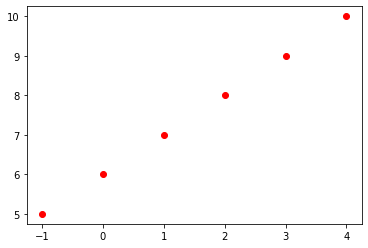

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'ro')
plt.show()

모델 만들기

-> 케라스 사용해서 Unit 1개인 모델 생성

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(1, input_shape=(1,)),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


모델 컴파일

-> kears는 모델 학습 전 컴파일, 손실함수와 옵티마이저, 메트릭 설정해야 함

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 756ms/step - loss: 41.5478 - mae: 6.4274
Epoch 2/30
1/1 [==============================] - 0s 15ms/step - loss: 35.8328 - mae: 5.9847
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 31.2718 - mae: 5.5891
Epoch 4/30
1/1 [==============================] - 0s 10ms/step - loss: 27.6202 - mae: 5.2353
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 24.6854 - mae: 4.9186
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 22.3157 - mae: 4.6348
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 20.3918 - mae: 4.3804
Epoch 8/30
1/1 [==============================] - 0s 12ms/step - loss: 18.8200 - mae: 4.1519
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 17.5264 - mae: 3.9464
Epoch 10/30
1/1 [==============================] - 0s 12ms/step - loss: 16.4527 - mae: 3.7615
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - los

# 2. 다중 선형회귀

Auto MPG 데이터를 사용해 연비 데이터 예측하는 모델 학습하기

In [ ]:
import pandas as pd
mpg = pd.read_csv('/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/3주차(01.02~01.07)/auto-mpg.csv',na_values = '?')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
df=mpg[mpg['horsepower'].isna()]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [ ]:
mpg = mpg.dropna()
mpg.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 32 to 374
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           6 non-null      float64
 1   cylinders     6 non-null      int64  
 2   displacement  6 non-null      float64
 3   horsepower    0 non-null      float64
 4   weight        6 non-null      int64  
 5   acceleration  6 non-null      float64
 6   model year    6 non-null      int64  
 7   origin        6 non-null      int64  
 8   car name      6 non-null      object 
dtypes: float64(4), int64(4), object(1)
memory usage: 480.0+ bytes


In [ ]:
X_data = mpg.drop(['mpg', 'car name'], axis=1)
X_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [ ]:
y_data = mpg['mpg']
y_data.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 7) (79, 7)
(313,) (79,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
print(X_train_s[:5])

[[ 0.30486156  0.28457757  0.14142863  0.75480297  1.1217589   0.49452752
  -0.68982474]
 [-0.87318372 -0.53588042 -0.32949862 -0.49312922 -0.22893966 -0.0572982
  -0.68982474]
 [ 0.30486156 -0.23665456 -0.19868549 -0.00252992 -0.37111846 -0.33321105
  -0.68982474]
 [ 1.48290683  1.18225513  1.18793363  1.3680521  -0.72656545 -1.16094962
  -0.68982474]
 [-0.87318372 -1.05711255 -1.06205212 -1.32309939  0.30423083  1.32226608
  -0.68982474]]


In [ ]:
y_train = y_train.values
y_test = y_test.values
print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(256, activation='relu', input_shape=(7,)),
layers.Dense(128, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(1)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               2048      
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 45,313
Trainable params: 45,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam',
metrics=['mae', 'mse'])

In [ ]:
EPOCHS = 1000
BATCH_SIZE = 256
history = model.fit(X_train_s, y_train,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
validation_split = 0.2,
verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 736ms/step - loss: 603.8385 - mae: 23.2621 - mse: 603.8385 - val_loss: 681.0888 - val_mae: 24.8994 - val_mse: 681.0888
Epoch 2/1000
1/1 [==============================] - 0s 35ms/step - loss: 597.6000 - mae: 23.1196 - mse: 597.6000 - val_loss: 675.6614 - val_mae: 24.7864 - val_mse: 675.6614
Epoch 3/1000
1/1 [==============================] - 0s 40ms/step - loss: 592.2819 - mae: 22.9971 - mse: 592.2819 - val_loss: 670.4628 - val_mae: 24.6759 - val_mse: 670.4628
Epoch 4/1000
1/1 [==============================] - 0s 46ms/step - loss: 587.3647 - mae: 22.8807 - mse: 587.3647 - val_loss: 664.9827 - val_mae: 24.5605 - val_mse: 664.9827
Epoch 5/1000
1/1 [==============================] - 0s 37ms/step - loss: 582.2137 - mae: 22.7600 - mse: 582.2137 - val_loss: 658.8356 - val_mae: 24.4315 - val_mse: 658.8356
Epoch 6/1000
1/1 [==============================] - 0s 58ms/step - loss: 576.4747 - mae: 22.6263 - mse: 576.4747 - val_loss: 651.6905 

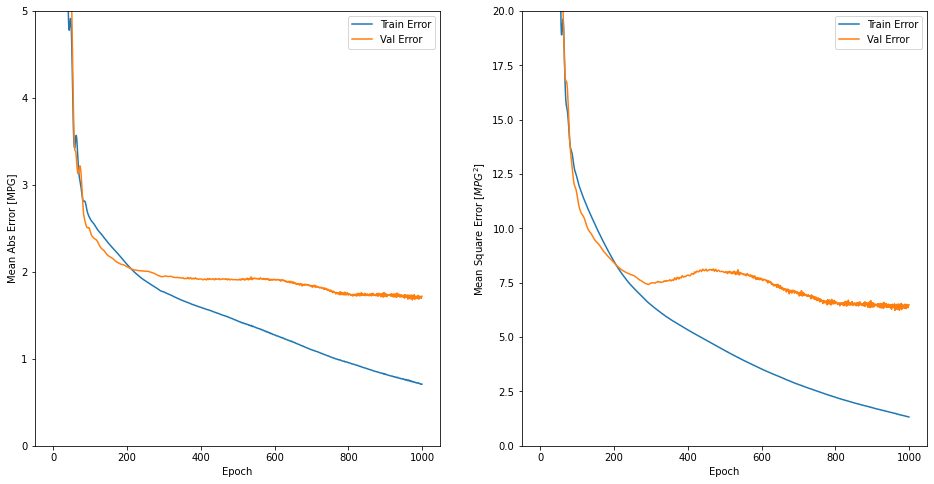

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

평가

-> 테스트 데이터로 평가 진행

In [ ]:
loss, mae, mse = model.evaluate(X_test_s, y_test, verbose=2)

3/3 - 0s - loss: 11.0374 - mae: 2.4292 - mse: 11.0374 - 22ms/epoch - 7ms/step


예측

-> 테스트 세트 사용해서 연비 예측

In [ ]:
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 5ms/step


array([[26.288822 ],
       [18.529747 ],
       [33.04421  ],
       [22.126806 ],
       [26.122997 ],
       [30.75437  ],
       [12.898548 ],
       [32.569977 ],
       [20.893871 ],
       [34.702686 ],
       [14.622976 ],
       [26.027176 ],
       [16.897472 ],
       [29.681515 ],
       [11.998167 ],
       [28.805525 ],
       [22.218948 ],
       [33.747574 ],
       [27.86309  ],
       [27.478172 ],
       [19.252747 ],
       [43.503414 ],
       [33.57001  ],
       [19.245705 ],
       [28.564495 ],
       [26.93431  ],
       [12.2802   ],
       [17.242207 ],
       [30.50895  ],
       [19.986107 ],
       [13.203028 ],
       [20.599384 ],
       [17.051443 ],
       [35.289593 ],
       [12.958277 ],
       [33.37924  ],
       [15.265573 ],
       [23.020557 ],
       [13.373726 ],
       [10.072673 ],
       [17.552631 ],
       [27.469406 ],
       [36.19063  ],
       [26.392044 ],
       [14.030319 ],
       [12.902151 ],
       [17.290419 ],
       [32.26

예측 결과 시각화

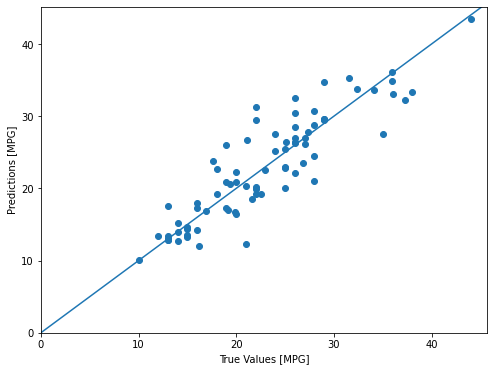

In [ ]:
y_pred = y_pred.flatten()
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()

오차 시각화

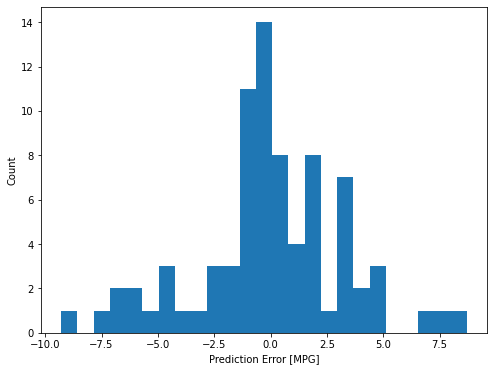

In [ ]:
error = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

# 3.이진 분류

In [ ]:
import pandas as pd
diabetes = pd.read_csv('/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/3주차(01.02~01.07)/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI']
(diabetes[cols] == 0).sum(axis=0)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

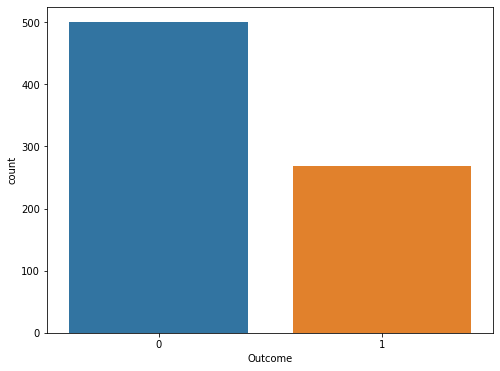

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data = diabetes)
plt.show()

In [ ]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X_data = diabetes.drop(['Outcome'], axis=1)
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y_data = diabetes['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,
test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [ ]:
import numpy as np
def impute_zero(data, col):
  df = data.loc[data[col] != 0, col]
  avg = np.sum(df) / len(df)
  k = len(data.loc[ data[col] == 0, col])
  data.loc[ data[col] == 0, col ] = avg
  print('%s : fixed %d, mean: %.3f' % (col, k, avg))
for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean: 121.847
BloodPressure : fixed 24, mean: 72.239
SkinThickness : fixed 176, mean: 28.596
Insulin : fixed 290, mean: 154.330
BMI : fixed 7, mean: 32.352


In [ ]:
(X_train[cols] == 0).sum(axis=0)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 43.2 KB


In [ ]:
for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean: 121.052
BloodPressure : fixed 11, mean: 73.091
SkinThickness : fixed 51, mean: 31.524
Insulin : fixed 84, mean: 161.186
BMI : fixed 4, mean: 32.883


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


In [ ]:
y_train = y_train.values
y_test = y_test.values
print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


모델 만들기

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(16, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
  model.add(Dropout(0.25))
  model.add(layers.Dense(32, activation='relu',kernel_initializer='glorot_uniform'))
  model.add(Dropout(0.25))
  model.add(layers.Dense(16, activation='relu',kernel_initializer='glorot_uniform'))
  model.add(Dropout(0.25))
  model.add(layers.Dense(8, activation='relu',kernel_initializer='glorot_uniform'))
  model.add(Dropout(0.25))
  model.add(layers.Dense(4, activation='relu',kernel_initializer='glorot_uniform'))
  model.add(Dropout(0.25))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                144       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                544       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 8)                

모델 컴파일

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer='Adamax',
metrics=['acc'])

모델 학습

In [ ]:
EPOCHS = 500
BATCH_SIZE = 32
history = model.fit(X_train_s, y_train,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
validation_split = 0.2,
verbose=1)

Epoch 1/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3714 - acc: 0.8269 - val_loss: 0.6298 - val_acc: 0.7398
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3849 - acc: 0.8065 - val_loss: 0.6298 - val_acc: 0.7398
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3693 - acc: 0.8513 - val_loss: 0.6303 - val_acc: 0.7561
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3660 - acc: 0.8065 - val_loss: 0.6318 - val_acc: 0.7480
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3914 - acc: 0.8045 - val_loss: 0.6324 - val_acc: 0.7398
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3677 - acc: 0.8024 - val_loss: 0.6336 - val_acc: 0.7561
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3735 - acc: 0.8167 - val_loss: 0.6307 - val_acc: 0.7561
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3662 - a

학습 곡선 시각화

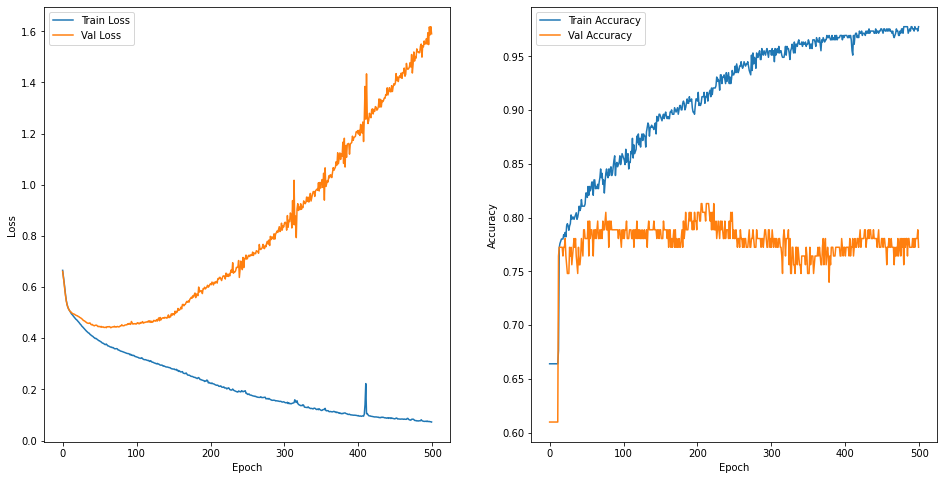

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
  plt.legend()
  plt.show()

plot_history(history)

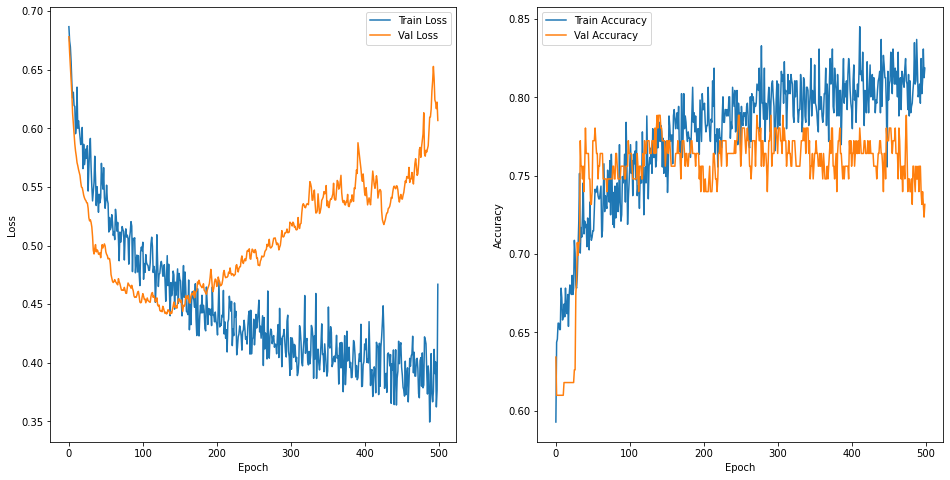

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test_s)
y_pred

5/5 [==============================] - 0s 4ms/step


array([[4.51264560e-01],
       [4.01935428e-01],
       [4.36898768e-02],
       [1.18009962e-01],
       [4.68298823e-01],
       [6.05985820e-01],
       [2.44464067e-11],
       [7.26888001e-01],
       [6.94809139e-01],
       [6.28295183e-01],
       [2.16069326e-01],
       [7.44205892e-01],
       [3.61932278e-01],
       [6.98729873e-01],
       [2.22223665e-04],
       [6.53576374e-01],
       [1.50882348e-01],
       [6.69509987e-04],
       [7.32235670e-01],
       [7.35296607e-01],
       [5.05693138e-01],
       [2.08192830e-07],
       [5.48692822e-01],
       [4.74812128e-02],
       [5.81829488e-01],
       [7.81594157e-01],
       [2.85405782e-03],
       [3.55645818e-10],
       [2.36814685e-05],
       [3.24722603e-02],
       [8.62702847e-01],
       [6.48819745e-01],
       [7.83944845e-01],
       [8.90793562e-01],
       [6.47323132e-01],
       [6.34148240e-01],
       [8.68400574e-01],
       [6.37230694e-01],
       [9.35365856e-02],
       [6.94561779e-01],


In [ ]:
y_pred= (y_pred >0.5).astype(np.int32).flatten()
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int32)

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



# 펭귄데이터 다중분류

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [ ]:
ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)

df = tfds.as_dataframe(ds_preview, info)

In [ ]:

print(df)

print(info.features)

     body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  \
0         4200.0        13.900000         45.500000              210.0   
1         4650.0        13.700000         40.900002              214.0   
2         5300.0        14.200000         51.299999              218.0   
3         5650.0        15.000000         47.799999              215.0   
4         5050.0        15.800000         46.299999              215.0   
..           ...              ...               ...                ...   
339       5600.0        17.000000         55.900002              228.0   
340       5200.0        14.800000         45.200001              212.0   
341       3400.0        17.100000         40.200001              193.0   
342       3200.0        17.200001         34.599998              189.0   
343       3550.0        18.500000         42.200001              180.0   

     island  sex  species  
0         0    0        2  
1         0    0        2  
2         0    1        2  

In [ ]:
class_names = ['Adelie', 'Chinstrap', 'Gentoo']

In [ ]:
df.head()

,body_mass_g,culmen_depth_mm,culmen_length_mm,flipper_length_mm,island,sex,species
0,4200.0,13.9,45.500000,210.0,0,0,2
1,4650.0,13.7,40.900002,214.0,0,0,2
2,5300.0,14.2,51.299999,218.0,0,1,2
3,5650.0,15.0,47.799999,215.0,0,1,2
4,5050.0,15.8,46.299999,215.0,0,1,2


In [ ]:
penguins = df

penguins.isna().sum(axis=0)

body_mass_g          2
culmen_depth_mm      2
culmen_length_mm     2
flipper_length_mm    2
island               0
sex                  0
species              0
dtype: int64

In [ ]:
penguins = penguins.dropna()
penguins.isna().sum(axis=0)

body_mass_g          0
culmen_depth_mm      0
culmen_length_mm     0
flipper_length_mm    0
island               0
sex                  0
species              0
dtype: int64

In [ ]:
X = penguins.drop(['species'], axis=1)
X.head()

,body_mass_g,culmen_depth_mm,culmen_length_mm,flipper_length_mm,island,sex
0,4200.0,13.9,45.500000,210.0,0,0
1,4650.0,13.7,40.900002,214.0,0,0
2,5300.0,14.2,51.299999,218.0,0,1
3,5650.0,15.0,47.799999,215.0,0,1
4,5050.0,15.8,46.299999,215.0,0,1


In [ ]:
X.shape

(342, 6)

In [ ]:
y = penguins["species"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(273, 6) (273,)
(69, 6) (69,)


In [ ]:
X_train.head()

,body_mass_g,culmen_depth_mm,culmen_length_mm,flipper_length_mm,island,sex
114,4550.0,20.000000,52.799999,205.0,1,1
7,3800.0,19.000000,49.500000,200.0,1,1
137,3050.0,17.100000,39.000000,191.0,2,0
334,3450.0,17.799999,36.000000,195.0,1,0
306,3050.0,16.600000,35.900002,190.0,2,0


In [ ]:
df = X_train[['culmen_depth_mm','culmen_length_mm',
'flipper_length_mm', 'body_mass_g','island','sex']]
df.head()

,culmen_depth_mm,culmen_length_mm,flipper_length_mm,body_mass_g,island,sex
114,20.000000,52.799999,205.0,4550.0,1,1
7,19.000000,49.500000,200.0,3800.0,1,1
137,17.100000,39.000000,191.0,3050.0,2,0
334,17.799999,36.000000,195.0,3450.0,1,0
306,16.600000,35.900002,190.0,3050.0,2,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_s = scaler.fit_transform(df)
df_s

array([[0.82142856, 0.7527273 , 0.55932203, 0.49275362, 0.5       ,
        0.5       ],
       [0.70238094, 0.63272733, 0.47457627, 0.27536232, 0.5       ,
        0.5       ],
       [0.4761905 , 0.25090915, 0.3220339 , 0.05797101, 1.        ,
        0.        ],
       ...,
       [0.26190475, 0.66545466, 0.88135593, 0.7826087 , 0.        ,
        0.5       ],
       [0.5238095 , 0.51272736, 0.25423729, 0.23188406, 0.5       ,
        0.        ],
       [0.58333331, 0.34545455, 0.33898305, 0.31884058, 0.        ,
        0.5       ]])

In [ ]:
dfX = pd.DataFrame(df_s,
columns=['bill_length_mm','bill_depth_mm',
'flipper_length_mm', 'body_mass_g'])
dfX.head()

ValueError: ignored

In [ ]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_train[:20]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(32, activation='relu', input_shape=(6,)),
layers.Dense(16, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(3, activation='softmax') ## 다중 분류
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 32)                224       
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dense_38 (Dense)            (None, 3)                 27        
                                                                 
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [ ]:
print(X_train.shape,X_test.shape)

(273, 6) (69, 6)


In [ ]:
EPOCHS = 500
BATCH_SIZE = 32
history = model.fit(X_train, y_train,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
validation_split=0.2)

Epoch 1/500
7/7 [==============================] - 1s 27ms/step - loss: 353.5690 - accuracy: 0.1835 - val_loss: 291.6674 - val_accuracy: 0.1818
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 238.7395 - accuracy: 0.1835 - val_loss: 156.3237 - val_accuracy: 0.1818
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 96.6908 - accuracy: 0.2798 - val_loss: 67.9041 - val_accuracy: 0.4364
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 45.9754 - accuracy: 0.4404 - val_loss: 7.7192 - val_accuracy: 0.3818
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 28.6622 - accuracy: 0.3761 - val_loss: 32.1698 - val_accuracy: 0.3818
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 18.8279 - accuracy: 0.3486 - val_loss: 14.5952 - val_accuracy: 0.4364
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 12.3119 - accuracy: 0.3028 - val_loss: 7.4779 - val_accuracy: 0.2364
Epoch 8/50

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
  plt.legend()
  plt.show()

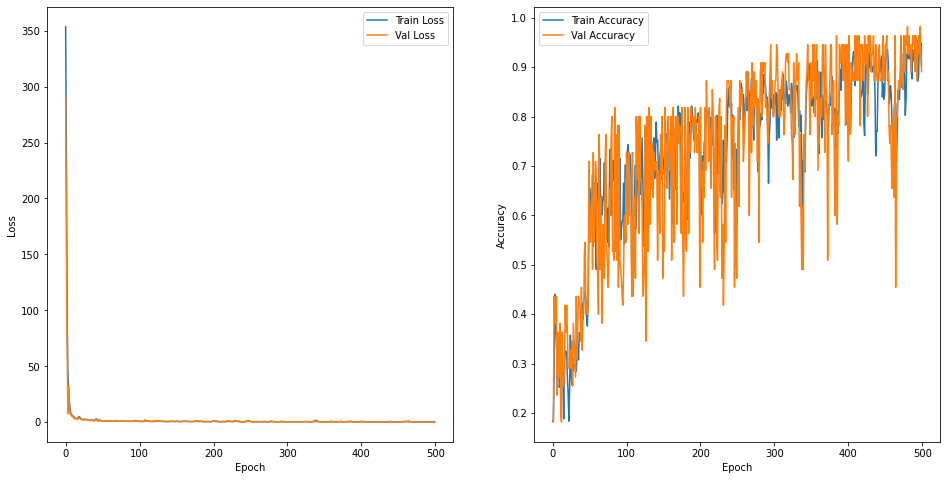

In [ ]:
plot_history(history)